# Emily and Michael's Research Notebook

## Add list of citations
https://ui.adsabs.harvard.edu/abs/2010ApJ...716....1B/abstract

https://iopscience.iop.org/article/10.1086/589678/pdf

https://ui.adsabs.harvard.edu/abs/2008ApJ...673..864J/abstract

## Import necessary packages


In [1]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

#This line is key if you want your plots to show up in the Jupyter notebook!
%matplotlib inline

## Import the data file

In [2]:
data = ascii.read('./data.dat')

In [3]:
data

ra,dec,run,Ar,u,g,r,i,z,uErr,gErr,rErr,iErr,zErr,pmL,pmB,pmErr
float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
181.6122,27.5726,5087,0.05,16.4,15.24,14.8,14.73,14.69,0.02,0.02,0.02,0.02,0.01,5.16,-1.45,2.72
181.61303,27.6077,5087,0.05,21.84,19.55,18.4,18.04,17.79,0.18,0.02,0.02,0.02,0.02,5.48,4.73,3.16
181.61416,27.35956,5112,0.05,19.76,17.56,16.61,16.23,16.07,0.03,0.01,0.02,0.03,0.03,3.14,7.92,2.79
181.6164,27.82464,5112,0.06,21.73,20.63,20.19,19.99,20.04,0.16,0.03,0.03,0.03,0.13,19.13,-1.08,5.08
181.62112,28.01623,5087,0.05,21.37,20.38,20.11,20.05,19.87,0.11,0.04,0.03,0.03,0.09,-3.65,-8.0,4.91
181.62252,27.63987,5087,0.05,17.34,15.58,14.82,14.64,14.51,0.02,0.02,0.02,0.02,0.01,9.74,-10.64,2.72
181.62469,27.32682,5112,0.05,21.63,20.52,20.21,20.1,19.91,0.13,0.02,0.03,0.04,1.07,6.73,-25.39,5.13
181.62582,27.42162,5112,0.05,23.16,21.09,19.67,19.04,18.66,0.46,0.03,0.02,0.03,0.04,35.17,7.8,4.18
181.63178,26.93836,5112,0.05,18.57,15.96,14.77,14.25,13.96,0.02,0.02,0.02,0.02,0.02,15.96,-8.01,2.72


In [4]:
g_minus_r = np.array(data['g'] - data['r'])
u_minus_g = np.array(data['u'] - data['g'])

def calc_metallicity(x, y):
    '''
    Calculate the metallicity of an array of stars
    
    x - The u-g value of the star as an array
    y - The g-r value of the stars as an array
    return - An array of metallicities
    '''
    
    #Calculate the masks
    result = np.zeros(len(y))
    mask = y < 0.6;
    
    #Update the values that are less than 0.6
    A = [-13.13, 14.09, 28.04, -5.51, -5.90, -58.68, 9.14, -20.61, 0.0, 58.20]
    result[mask] = A[0] + A[1]*x[mask] + A[2]*y[mask] + A[3]*x[mask]*y[mask] + A[4]*x[mask]**2 + A[5]*y[mask]**2 + A[6]*(x[mask]**2)*y[mask] + A[7]*x[mask]*y[mask]**2 + A[8]*x[mask]**3 + A[9]*y[mask]**3
        
    #Set all values greater than 0.6 to -0.6
    result[np.invert(mask)] = -0.6
    
    #Return the final value
    return result

metallicity = calc_metallicity(u_minus_g, g_minus_r)
print("g-r:", g_minus_r[:10])
print("metallicity:", metallicity[:10])

g-r: [0.44 1.15 0.95 0.44 0.27 0.76 0.31 1.42 1.19 0.98]
metallicity: [-0.8191296  -0.6        -0.6        -1.0249488  -1.06648793 -0.6
 -0.57584997 -0.6        -0.6        -0.6       ]


In [5]:
#Define functions to calculate Mr
def calc_delta_Mr(metallicity):
    return 4.50 - 1.11*metallicity - 0.18*metallicity**2
    
def calc_Mr0(g_minus_i):
    return -5.06 + 14.32*g_minus_i - 12.97*g_minus_i**2 + 6.127*g_minus_i**3 - 1.267*g_minus_i**4 + 0.0967*g_minus_i**5
    
def calc_Mr(g_minus_i, metallicity):
    '''
    Calculate the absolute magnitude of a list of stars
    
    g_minus_i - The g - r values of the stars as an array
    metallicity - The metallicity of the stars as an array
    return - The absolute magnitude in the r band as an array
    '''
    
    return calc_Mr0(g_minus_i) + calc_delta_Mr(metallicity)

g_minus_i = np.array(data['g'] - data['i'])
print()
Mr = calc_Mr(g_minus_i, metallicity)
print(Mr[:10])


[4.88853564 7.35863457 6.99674651 5.64485961 3.93777605 6.21245575
 4.16177266 8.80018053 7.81967066 7.13325661]


        r         
------------------
 960.0478353887381
1615.3739905115644
 836.8559300946307
 8110.134916404376
17157.135844448414
  526.633945340119
16204.866854398062
1492.6703079335266
 245.5081237852428
1359.4044223038136


(array([1.87183e+05, 1.20612e+05, 6.40630e+04, 3.90080e+04, 2.80710e+04,
        2.29640e+04, 1.95160e+04, 1.67110e+04, 1.39910e+04, 1.11130e+04,
        9.26800e+03, 7.66600e+03, 6.34600e+03, 5.38800e+03, 4.27500e+03,
        3.55100e+03, 2.84900e+03, 2.51200e+03, 1.98500e+03, 1.60900e+03,
        1.29600e+03, 1.04400e+03, 9.31000e+02, 7.17000e+02, 6.40000e+02,
        5.07000e+02, 4.43000e+02, 3.60000e+02, 3.09000e+02, 2.63000e+02,
        2.34000e+02, 1.72000e+02, 1.70000e+02, 1.36000e+02, 1.28000e+02,
        1.06000e+02, 7.70000e+01, 7.40000e+01, 5.90000e+01, 5.30000e+01,
        4.40000e+01, 3.10000e+01, 4.00000e+01, 3.60000e+01, 2.30000e+01,
        2.90000e+01, 2.70000e+01, 1.90000e+01, 1.70000e+01, 1.50000e+01,
        1.40000e+01, 1.60000e+01, 1.00000e+01, 1.00000e+01, 7.00000e+00,
        4.00000e+00, 4.00000e+00, 5.00000e+00, 5.00000e+00, 6.00000e+00,
        2.00000e+00, 1.00000e+00, 2.00000e+00, 2.00000e+00, 5.00000e+00,
        7.00000e+00, 1.00000e+00, 1.00000e+00, 2.00

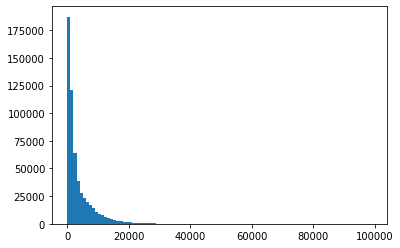

In [22]:
#Find the distance to the star in Parsec
def calc_distance(r, Mr):
    '''
    Calculate the distance to stars in parsecs
    
    r - The r-band visual magnitude of the stars as an array
    Mr - The r-band absolute magnitude of the stars as an array
    return - The distances to the stars in parsecs as an array
    '''
    return 10**((r - Mr)/5 + 1)

distances = calc_distance(data['r'], Mr)
print(distances[:10])
plt.hist(distances, range(0, 100000, 1000))

## Problem 1

In [7]:
#Calculate the stellar density function
def calc_density(D, distance, delta):
    '''
    Estimates the stellar density of an array of stars at a given distance
    D - An array of distances of stars
    distance - The distance in parsecs at which the density is calculated at
    delta - The width of the bin used to calculate density
    '''
    #Use the volume in a spherical shell with inner radius distance and outer radius (distance + delta)
    volume = (314/41253)*4/3*np.pi*((distance + delta)**3 - distance**3)
    
    #Density is the number of stars in that bin
    stars_mask = np.logical_and(D >= distance, D <= (distance + delta))
    num_stars = np.count_nonzero(stars_mask)
    
    #Density is the number of stars divided by the volume
    return num_stars / volume


C:\Users\micha\AppData\Local\Temp\ipykernel_20244\2840669191.py:14: RuntimeWarning: divide by zero encountered in log
  log_density.append(np.log(calc_density(distances[mask], i, bin_width)))


Text(0.5, 1.0, 'Stellar density vs Distance')

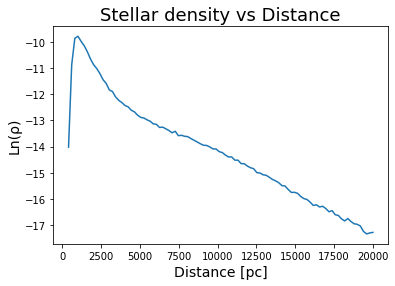

In [38]:
#Create a mask containing the stars we want to look at
mask = np.logical_and(g_minus_r > 0.2, g_minus_r < 0.4) 

#Calculate the distances to plot over
final = 20000
initial = 0
bins = 100
bin_width = (final - initial) / bins
points = np.linspace(initial, final, num = bins)

#Calculate the ln(density) at each point for each mask
log_density = []
for i in points:
    log_density.append(np.log(calc_density(distances[mask], i, bin_width)))
    
#Plot the results
plt.plot(points, log_density)

#Set the axes labels and plot label
plt.xlabel("Distance [pc]", fontsize = 14)
plt.ylabel("Ln(\u03C1)", fontsize = 14)
plt.title("Stellar density vs Distance", fontsize = 18)

## Problem 2

C:\Users\micha\AppData\Local\Temp\ipykernel_20244\1842095925.py:23: RuntimeWarning: divide by zero encountered in log
  log_density[j][i] = np.log(calc_density(distances[masks[j]], points[i], bin_width))


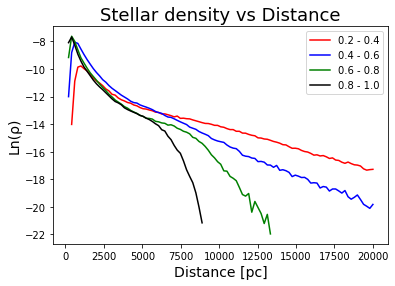

In [9]:
#Create a list of masks to cover all the different ranges of g-r
masks = []
masks.append(np.logical_and(g_minus_r > 0.2, g_minus_r < 0.4))
masks.append(np.logical_and(g_minus_r > 0.4, g_minus_r < 0.6)) 
masks.append(np.logical_and(g_minus_r > 0.6, g_minus_r < 0.8)) 
masks.append(np.logical_and(g_minus_r > 0.8, g_minus_r < 1.0))

#Create an array of colors to represent the different masks
colors = ["r", "b", "g", "black"]
mask_names = ["0.2 - 0.4", "0.4 - 0.6", "0.6 - 0.8", "0.8 - 1.0"]

#Calculate the distances to plot over
final = 20000
initial = 0
bins = 100
bin_width = (final - initial) / bins
points = np.linspace(initial, final, num = bins)

#Calculate the ln(density) at each point for each mask
log_density = np.zeros((len(masks), bins))
for i in range(len(points)):
    for j in range(len(masks)):
        log_density[j][i] = np.log(calc_density(distances[masks[j]], points[i], bin_width))
    
#Plot the results
for i in range(len(masks)):
    plt.plot(points, log_density[i], c = colors[i])

#Set the axes labels and plot label
plt.xlabel("Distance [pc]", fontsize = 14)
plt.ylabel("Ln(\u03C1)", fontsize = 14)
plt.title("Stellar density vs Distance", fontsize = 18)
plt.legend(mask_names)

## Problem 3

C:\Users\micha\AppData\Local\Temp\ipykernel_20244\913025531.py:21: RuntimeWarning: divide by zero encountered in log
  log_density[j][i] = np.log(calc_density(distances[metallicity_masks[j]], points[i], bin_width))


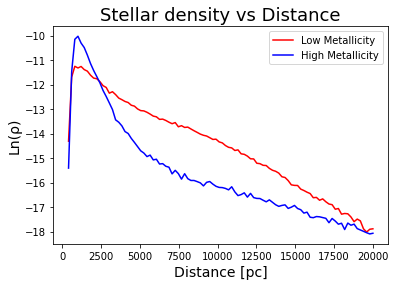

In [10]:
#Create a list of masks to cover all the different ranges of g-r
metallicity_masks = []
metallicity_masks.append(np.logical_and(masks[0], metallicity < -1))
metallicity_masks.append(np.logical_and(masks[0], metallicity > -1))

#Create an array of colors to represent the different masks
colors = ["r", "b"]
mask_names = ["Low Metallicity", "High Metallicity"]

#Calculate the distances to plot over
final = 20000
initial = 0
bins = 100
bin_width = (final - initial) / bins
points = np.linspace(initial, final, num = bins)

#Calculate the ln(density) at each point for each mask
log_density = np.zeros((len(metallicity_masks), bins))
for i in range(len(points)):
    for j in range(len(metallicity_masks)):
        log_density[j][i] = np.log(calc_density(distances[metallicity_masks[j]], points[i], bin_width))
    
#Plot the results
for i in range(len(metallicity_masks)):
    plt.plot(points, log_density[i], c = colors[i])

#Set the axes labels and plot label
plt.xlabel("Distance [pc]", fontsize = 14)
plt.ylabel("Ln(\u03C1)", fontsize = 14)
plt.title("Stellar density vs Distance", fontsize = 18)
plt.legend(mask_names)

## Problem 4

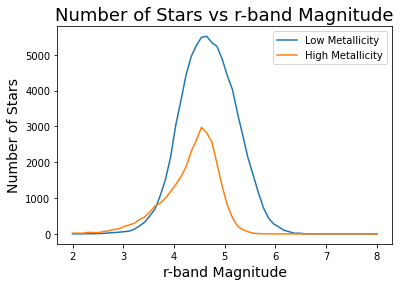

In [17]:
#Calculate the distances to plot over
final = 8
initial = 2
bin_width = 0.1
bins = (int)((final-initial) // bin_width) + 1
points = np.linspace(initial, final, num = bins)

#Calculate the masks we need
low_metallicity_mask = metallicity_masks[0]
high_metallicity_mask = metallicity_masks[1]

#Calculate the number of stars in each bin of magnitude
num_stars_low_metallicity = []
num_stars_high_metallicity = []
for i in points:
    magnitude_mask = np.logical_and(Mr > i, Mr < (i + bin_width))
    num_stars_low_metallicity.append(np.count_nonzero(np.logical_and(magnitude_mask, low_metallicity_mask)))
    num_stars_high_metallicity.append(np.count_nonzero(np.logical_and(magnitude_mask, high_metallicity_mask)))

#Plot the two graphs
plt.plot(points, num_stars_low_metallicity)
plt.plot(points, num_stars_high_metallicity)

#Set the axes labels and plot label
plt.xlabel("r-band Magnitude", fontsize = 14)
plt.ylabel("Number of Stars", fontsize = 14)
plt.title("Number of Stars vs r-band Magnitude", fontsize = 18)
plt.legend(mask_names)

## Problem 5